# One-Dimensional Climate Models: Brown Dwarfs w/ Clouds in Chemical Disequilibrium

In this tutorial you will learn how to run 1-D climate models for brown dwarfs with Virga clouds and chemical disequilibrium. For a more in depth look at the climate-cloud code check out [Mang et al. 2026]() (note this should also be cited if using this code/tutorial).

You should already be familiar with running 1-D climate models with running a [simple clear brown dwarf model](https://natashabatalha.github.io/picaso/notebooks/D_climate/1_BrownDwarf_PreW.html) and running clouds in [equilibrium](https://natashabatalha.github.io/picaso/notebooks/D_climate/5_CloudyBrownDwarf_PreW.html)

What you need to have downloaded for clouds to work:

[Virga](https://natashabatalha.github.io/virga/installation.html)


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import virga.justdoit as vj
import virga.justplotit as cldplt
jpi.output_notebook()
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import show, figure
import xarray as xr
import pickle

Loading BokehJS ...

In [2]:
# #sonora bobcat cloud free structures file
# sonora_profile_db = '/data/sonora_bobcat/structure/structures_m+0.0'
# sonora_profile_db = '/Users/nbatalh1/Documents/data/sonora_bobcat/structures_m+0.0'
sonora_profile_db = os.path.join(os.getenv('picaso_refdata'),'sonora_grids','bobcat')

We are going to initialize our climate run like other disequilibrium runs without using the pre-weighted ck tables

In [3]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

#note you need to put the climate keyword to be True in order to do so
# now you need to add these parameters to your calculation

teff= 400 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

gases_fly = ['CO','CH4','H2O','NH3','CO2','N2','HCN','H2','PH3','C2H2','Na','K','TiO','VO','FeH']
opacity_ck =  jdi.opannection(method='resortrebin',preload_gases=gases_fly)# grab your opacities

In [4]:
nlevel = 91 # number of plane-parallel levels in your code

# Here we're going to start with a cloudfree Sonora Elf Owl model
pressure,temp_guess = np.loadtxt("profilegrid_kz_1d9_qt_onfly_400_grav_1000_mh_+0.0_cto_1.0.dat",
                                usecols=[1,2],unpack=True, skiprows = 1)

In [5]:
rcb_guess = 45 # top most level of guessed convective zone
# for the sake of time of this tutorial, I set it to 40 because I know where it should be in this case. In general for clouds it is better
# to start deeper in the atmosphere and work your way up. It just takes more time.

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

# this is the Kzz parameter
kzval = pressure*0+1e9

In [6]:
virga_dir = os.path.join(os.getenv('picaso_refdata'),'virga') # path to virga directory with the Mie scattering files

All requirements needed for this notebook will be met from properly following the previous notebook for clouds in equilibrium chemistry

**New PICASO code parameters**:
We've introduced other optional chemical treatments into the disequilibrium runs that should be included in the `atmosphere()` function

1. `vol_rainout` : (True/False) Follows rainout chemistry (ie. Sonora Bobcat) even in disequilibrium. Default = False
2. `cold_trap` : (True/False) If True, the abundances of volatile species like H2O, NH3, and CH4 will not be allowed to increase after they begin to rainout. Default = False
3. `no_ph3` :  (True/False) If True, completely remove PH3 from the atmosphere. Default = False

These parameters are included to increase flexibility for you when you want to generate your own model! To play around with these different parameters you can look at the [chemistry notebooks](https://natashabatalha.github.io/picaso/tutorials.html#chemistry)

*Note* that all disequilibrium models default to follow the kinetic CO2 prescription described in [Zahnle & Marley 2014](https://ui.adsabs.harvard.edu/abs/2014ApJ...797...41Z/abstract) where the abundance quenches with respect to CO in disequilibrium. This is a correction applied to [Sonora Elf Owl v2](https://ui.adsabs.harvard.edu/abs/2025RNAAS...9..108W/abstract)


Our recommendation to follow for the latest release of the Sonora family of models are as follows:
1. `vol_rainout` = True
2. `cold_trap` = True
3. `no_ph3` = True

In [7]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure,
                      rcb_guess=rcb_guess, rfacv = rfacv)

cl_run.atmosphere(mh=1, cto_relative=1, chem_method='visscher',
                quench=True, cold_trap = True, no_ph3 = True, vol_rainout=True)#

cl_run.inputs['atmosphere']['profile']['kz']=kzval

# Let's add in a few different cloud species that we expect to condense in the deeper parts of the atmosphere of this 400 K brown dwarf
df_cld_guess=cl_run.virga(condensates=['Cr', 'MnS', 'Na2S', 'ZnS', 'KCl'], fsed=2.0, directory=virga_dir, latent_heat=True)

In this case, with a good starting radiative-convective boundary guess and a good starting PT profile, this run should take ~10 minutes to compute. If it takes significantly longer longer there might be something wrong. Most times though, cloudy runs do take much longer on timescales of 30 minutes to an hour depending on how deep your intial radiaitve-convective zone boundary is.

In [8]:
out = cl_run.climate(opacity_ck, save_all_profiles = True, with_spec=True,
        diseq_chem = True, self_consistent_kzz =False)

SUMMARY
-------
Clouds: True
quench True
cold_trap True
vol_rainout True
no_ph3 True
Moist Adiabat: False
Kzz for chem: [1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09 1.e+09
 1.e+09]


cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Computed quenched levels at {'CO-CH4-H2O': np.int64(74), 'CO2': np.int64(67), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.3383512429196576  Tau tolerance is  0.4676702485839315


Iteration number  0 , min , max temp  97.07595217065752 3475.327953233125 , flux balance  -0.06857046738999288
Iteration number  1 , min , max temp  101.29356479978331 3475.383184029349 , flux balance  -0.06850137667305807
Iteration number  2 , min , max temp  105.106965879701 3475.451337941017 , flux balance  -0.06841610900253045


Iteration number  3 , min , max temp  108.70140911189293 3475.5355124931752 , flux balance  -0.06831078133737335
Iteration number  4 , min , max temp  112.10744085158684 3475.639220279177 , flux balance  -0.06818098668914052
Iteration number  5 , min , max temp  115.3564182446795 3475.766475374621 , flux balance  -0.06802168387482563
Iteration number  6 , min , max temp  118.47449140456283 3475.921846484012 , flux balance  -0.06782712806196078
Iteration number  7 , min , max temp  121.48222443883536 3476.1104858746503 , flux balance  -0.06759083057807258
Iteration number  8 , min , max temp  124.39543160143317 3476.3381333383154 , flux balance  -0.06730554872349574
Iteration number  9 , min , max temp  127.17938470438966 3476.611097701396 , flux balance  -0.06696330222475431
Iterations exceeded it_max ! sorry 
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or beca

no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.9993233244200024  Tau tolerance is  1.5211342582729834


Big iteration is  127.17938470438966 0
Iteration number  0 , min , max temp  129.4446293141681 3477.7466503291926 , flux balance  -0.08836680904625227


Iteration number  1 , min , max temp  131.6737829136112 3478.964248982344 , flux balance  -0.08677898220472258
Iteration number  2 , min , max temp  133.86801419978272 3480.2687313445504 , flux balance  -0.0850718653020132
Iteration number  3 , min , max temp  136.02863712136332 3481.66781121493 , flux balance  -0.08323634067463331
Iteration number  4 , min , max temp  138.15703274076566 3483.1677824801623 , flux balance  -0.08126313488050363
Iteration number  5 , min , max temp  140.25457335282476 3484.774892500102 , flux balance  -0.07914286596989076
Iteration number  6 , min , max temp  142.32256985308425 3486.495297260662 , flux balance  -0.076866085995576
Iteration number  7 , min , max temp  144.36225718407317 3488.3350189674024 , flux balance  -0.07442332030223203
Iteration number  8 , min , max temp  146.37479751878206 3490.299907664332 , flux balance  -0.07180510164695104
Iteration number  9 , min , max temp  148.36127566288397 3492.3956072966157 , flux balance  -0.06900199870

cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(74), 'CO2': np.int64(67), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 1.6982310114146806  Tau tolerance is  2.3973959882963745


Big iteration is  148.36127566288397 1
Iteration number  0 , min , max temp  149.10149150157207 3495.3457568299996 , flux balance  -0.08400357547756393


Iteration number  1 , min , max temp  149.8769497163065 3498.456460990265 , flux balance  -0.0797355960822556
Iteration number  2 , min , max temp  150.68760117726129 3501.733320379009 , flux balance  -0.07521145053761592
Iteration number  3 , min , max temp  151.53316493177272 3505.1812361335474 , flux balance  -0.0704213165654726
Iteration number  4 , min , max temp  152.41315027339502 3508.7985056565103 , flux balance  -0.06535577478372329
Iteration number  5 , min , max temp  153.32687872055786 3512.59344131197 , flux balance  -0.06000569783583811
Iteration number  6 , min , max temp  154.27350706697925 3516.568492456859 , flux balance  -0.054362241040055
Iteration number  7 , min , max temp  155.25205659770157 3520.7254628748815 , flux balance  -0.04841688957446251
Iteration number  8 , min , max temp  156.26144438438627 3525.034929696396 , flux balance  -0.04216154669733274


Iteration number  9 , min , max temp  157.30052416569956 3529.5078164091933 , flux balance  -0.03558918817481213
Iterations exceeded it_max ! sorry 
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 1.6221691891333787  Tau tolerance is  2.898402220953105


Big iteration is  157.30052416569956 2
Iteration number  0 , min , max temp  158.30349426916564 3535.4276918080163 , flux balance  -0.03478721196065647
Iteration number  1 , min , max temp  159.3333258811886 3541.534595669979 , flux balance  -0.02565303894444579


Iteration number  2 , min , max temp  160.38939090423995 3547.808959671139 , flux balance  -0.016144772329155434
Iteration number  3 , min , max temp  161.47223968681558 3554.230319273939 , flux balance  -0.006273762311838105
Iteration number  4 , min , max temp  162.15376998564858 3558.212027655567 , flux balance  -8.716651186079958e-05
Iteration number  5 , min , max temp  162.17512455338633 3558.262690492785 , flux balance  -1.4778697524482196e-06
In t_start: Converged Solution in iterations  5
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting c

no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 1.6352730068583128  Tau tolerance is  2.7961064804028326


Big iteration is  162.17512455338633 3
Iteration number  0 , min , max temp  161.80490581687567 3565.41551734603 , flux balance  -0.000585244653941341
Iteration number  1 , min , max temp  161.7829693468692 3565.7371014061714 , flux balance  -9.562737910297659e-06
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(74), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.6662312734467366  Tau tolerance is  2.5580098197684973


Big iteration is  161.7829693468692 4
Iteration number  0 , min , max temp  161.85897336776628 3569.5363875128432 , flux balance  -9.422432075599093e-05
Iteration number  1 , min , max temp  161.86647101855337 3569.584750924606 , flux balance  -1.4894904960659857e-06
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(74), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 1.3239217851207996  Tau tolerance is  2.5284150137219323


Profile converged before itmx
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.4713799200411257  Tau tolerance is  2.516947549077784


Iteration number  0 , min , max temp  161.57402213205643 3557.9770513000685 , flux balance  0.00027289259723125523
Iteration number  1 , min , max temp  161.56251306907188 3557.7756650095685 , flux balance  5.316697657825925e-06
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.34006574549168755  Tau tolerance is  2.4874543834822656


Big iteration is  161.56251306907188 0
Iteration number  0 , min , max temp  162.51460314128045 3563.667767520963 , flux balance  -0.000143247674312362
Iteration number  1 , min , max temp  162.5401708262654 3563.7383100375832 , flux balance  -2.4577311749437997e-06
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(74), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.703366912545731  Tau tolerance is  2.4273665343145954


Big iteration is  162.5401708262654 1
Iteration number  0 , min , max temp  162.3281691120366 3565.4021359503 , flux balance  -5.226280524939613e-05
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(74), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.7830006910013307  Tau tolerance is  2.4487101357239798


Big iteration is  162.3281691120366 2
Iteration number  0 , min , max temp  162.49028623537518 3565.558652447689 , flux balance  -6.006885979974472e-06
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(74), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.6502643196621074  Tau tolerance is  2.5417703451439424


Profile converged before itmx
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.6673183979192974  Tau tolerance is  2.5438374527538326


Iteration number  0 , min , max temp  161.84726280308502 3554.7461853996224 , flux balance  -1.7598933400187633e-05
Iteration number  1 , min , max temp  161.81865517451692 3554.7400354944302 , flux balance  -1.3937438421999156e-07
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.09902320275262921  Tau tolerance is  2.5084849765267383


Big iteration is  161.81865517451692 0
Iteration number  0 , min , max temp  162.7426851215912 3559.263061452857 , flux balance  -0.00013080653499112475
Iteration number  1 , min , max temp  162.7674466534943 3559.327810421815 , flux balance  -2.414880831764804e-06
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.8050456514157065  Tau tolerance is  2.462691283939778


Big iteration is  162.7674466534943 1
Iteration number  0 , min , max temp  162.59396913107156 3560.2346006645844 , flux balance  -3.318186263126734e-05
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.728561590139559  Tau tolerance is  2.4758336254468225


Big iteration is  162.59396913107156 2
Iteration number  0 , min , max temp  162.69667718609068 3560.303102293255 , flux balance  -2.926416416536837e-06
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.6244731833641444  Tau tolerance is  2.4911881588531206


Profile converged before itmx
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.6090485555070302  Tau tolerance is  2.5012015780589816


Iteration number  0 , min , max temp  162.23576209825367 3553.7207273031404 , flux balance  -0.00020304889571518822
Iteration number  1 , min , max temp  162.21755140589312 3553.8282708351335 , flux balance  -3.971322239020584e-06
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.06757910366179298  Tau tolerance is  2.4825947801310866


Big iteration is  162.21755140589312 0
Iteration number  0 , min , max temp  162.858396131378 3557.0695425824865 , flux balance  -0.00010832298914153392
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.7616979590482202  Tau tolerance is  2.4734319707060415


Big iteration is  162.858396131378 1
Iteration number  0 , min , max temp  162.75840997809775 3557.778710048066 , flux balance  -2.7739308012025577e-05
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.7040046025297197  Tau tolerance is  2.4799702304974107


Big iteration is  162.75840997809775 2
Iteration number  0 , min , max temp  162.83454352437627 3557.8856735470176 , flux balance  -4.484584158393336e-06
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.5899674674240254  Tau tolerance is  2.47503588471675


Profile converged before itmx
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.563372673362661  Tau tolerance is  2.4812443171654945


Iteration number  0 , min , max temp  162.67101762665132 3555.7693007025982 , flux balance  -0.00017457121575525637
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.01435205114208049  Tau tolerance is  2.467538352467282


Big iteration is  162.67101762665132 0
Iteration number  0 , min , max temp  162.8945413622301 3557.1091301370993 , flux balance  -5.293796784482568e-05
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.7221089234820792  Tau tolerance is  2.4554880754425676


Big iteration is  162.8945413622301 1
Iteration number  0 , min , max temp  162.86687788629268 3557.4207090220866 , flux balance  -1.3344325545418847e-05
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.7204652115376935  Tau tolerance is  2.4584486159971055


Big iteration is  162.86687788629268 2
Iteration number  0 , min , max temp  162.89630070236572 3557.4807242187867 , flux balance  -2.61323106708538e-06
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.5685266769951678  Tau tolerance is  2.483017294766373


Profile converged before itmx
final [0, 41, 89, 0, 0, 0]
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.553747895929396  Tau tolerance is  2.486013961454489


Iteration number  0 , min , max temp  162.90419216794672 3557.6405823514597 , flux balance  -6.630348704860757e-06
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.0057055758817696756  Tau tolerance is  2.472813078290206


Big iteration is  162.90419216794672 0
Iteration number  0 , min , max temp  162.9003845384215 3557.688368413607 , flux balance  -2.0443816406467242e-06
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.7217991091444285  Tau tolerance is  2.4401363903840547


Big iteration is  162.9003845384215 1
 We are already at a root, tolf , test =  5e-05 ,  4.074099452651379e-05
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 2.7313032359205653  Tau tolerance is  2.4409903361055107


Big iteration is  162.9003845384215 2
 We are already at a root, tolf , test =  5e-05 ,  4.4132220128306795e-05
cold_trap=True; Adjusting cold trap
no_ph3=True; Goodbye PH3!
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Computed quenched levels at {'CO-CH4-H2O': np.int64(73), 'CO2': np.int64(66), 'NH3-N2': np.int64(75), 'HCN': np.int64(73), 'PH3': np.int64(72)}
Quench=True; Adjusting quench chemistry
vol_rainout=True; Adjusting volatile rainout
cold_trap=True; Adjusting cold trap


no_ph3=True; Goodbye PH3!


Doing clouds: Max TAUCLD diff is 0.5587862474720104  Tau tolerance is  2.4921334768716186


Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


## Plot the P-T Profile

Now we can plot the results, first let's grab the condensation curve for all our cloud species

In [9]:
kcl_cond_p, kcl_cond_t = vj.condensation_t('KCl', 1, 2.2, pressure = out['pressure'])
na2s_cond_p, na2s_cond_t = vj.condensation_t('Na2S', 1, 2.2, pressure = out['pressure'])
mns_cond_p, mns_cond_t = vj.condensation_t('MnS', 1, 2.2, pressure = out['pressure'])
zns_cond_p, zns_cond_t = vj.condensation_t('ZnS', 1, 2.2, pressure = out['pressure'])
cr_cond_p, cr_cond_t = vj.condensation_t('Cr', 1, 2.2, pressure = out['pressure'])

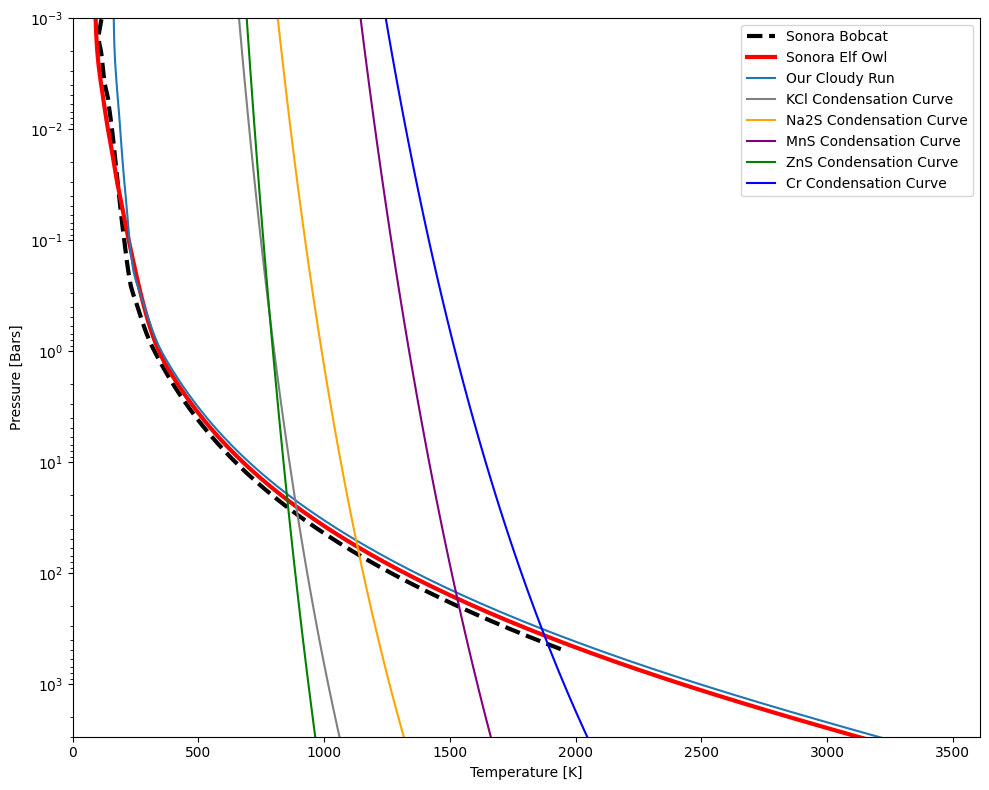

In [10]:
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

pressure_elfowl,temp_elfowl = np.loadtxt(f"profilegrid_kz_1d9_qt_onfly_400_grav_1000_mh_+0.0_cto_1.0.dat",
                                usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,8))
plt.ylabel("Pressure [Bars]")
plt.xlabel('Temperature [K]')
plt.xlim(0,max(out['temperature'])+50)
plt.ylim(3e3,1e-3)

plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")
plt.semilogy(temp_elfowl,pressure_elfowl,color='r',linewidth=3, label="Sonora Elf Owl")
plt.semilogy(out['temperature'],out['pressure'],label="Our Cloudy Run")

plt.plot(kcl_cond_t,kcl_cond_p, color ='gray', label = 'KCl Condensation Curve')
plt.plot(na2s_cond_t,na2s_cond_p, color ='orange', label = 'Na2S Condensation Curve')
plt.plot(mns_cond_t,mns_cond_p, color ='purple', label = 'MnS Condensation Curve')
plt.plot(zns_cond_t,zns_cond_p, color ='green', label = 'ZnS Condensation Curve')
plt.plot(cr_cond_t,cr_cond_p, color ='blue', label = 'Cr Condensation Curve')

plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# once again we can do a quick sanity check to make sure a cloud is present
show(jpi.mixing_ratio(out['spectrum_output']['full_output'], limit=14, height=600, width=600))

In [12]:
# once again we can do a quick sanity check to make sure a cloud is present
show(cldplt.all_optics_1d(out['virga_output'], wave_range=[1,2]))

## Cloudy vs Clear Spectra

In [13]:
opa_mon = jdi.opannection(wave_range=[0.3,15])

hi_res = jdi.inputs(calculation="browndwarf") # start a calculation
teff= 400 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s
hi_res.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity

hi_res.atmosphere(df=out['ptchem_df'])

# now let's add the cloud optical properties
hi_res.clouds(df=out['cld_df'])

df_spec = hi_res.spectrum(opa_mon, calculation='thermal',full_output=True)

wno, fp = df_spec['wavenumber'], df_spec['thermal'] #erg/cm2/s/cm
wno,fp = jdi.mean_regrid(wno,fp, R =200)

In [14]:
jpi.show(jpi.spectrum(wno,fp,x_axis_type='log',y_axis_type='log'))

This next spectrum is from the Sonora Elf Owl grid of models which are cloud-free to use as reference. To download the rest of the Sonora Elf Owl grid you can find them separated by [L](https://zenodo.org/records/10385987), [T](https://zenodo.org/records/10385821), and [Y](https://zenodo.org/records/10381250) dwarfs.

In [15]:
ds_elfowl = xr.load_dataset("spectra_logzz_9.0_teff_400.0_grav_1000.0_mh_0.0_co_1.0.nc")

Now let's regrid the spectra to R=200 to make sure the two spectra are on the same grid

In [16]:
wno_elfowl, fp_elfowl = jdi.mean_regrid(1e4/ds_elfowl['wavelength'].values,ds_elfowl['flux'].values,R=200)

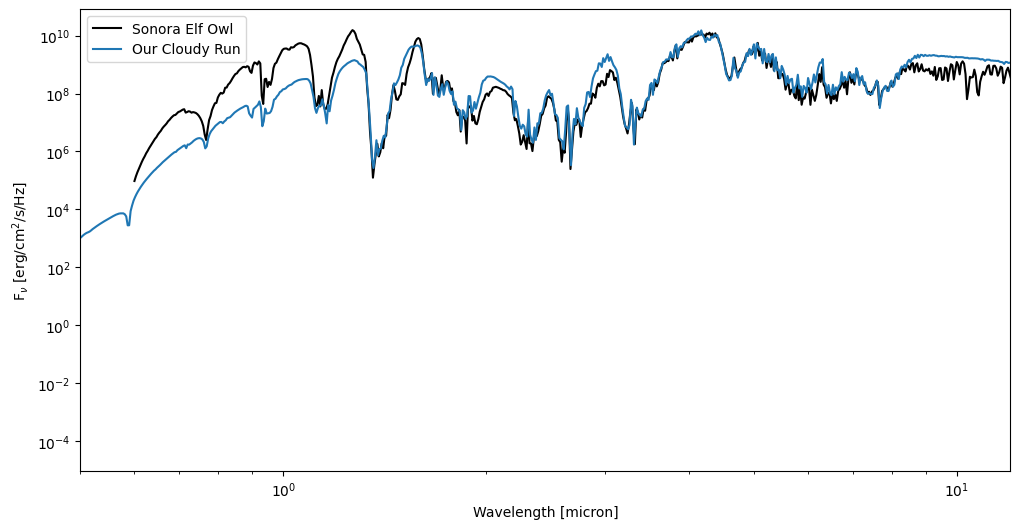

In [17]:
fig = plt.figure(figsize=(12,6))
plt.loglog(1e4/wno_elfowl,fp_elfowl, 'k', label = 'Sonora Elf Owl')
plt.loglog(1e4/wno,fp, label = 'Our Cloudy Run')
plt.xlabel('Wavelength [micron]')
plt.ylabel('F$_\\nu$ [erg/cm$^2$/s/Hz]')
plt.xlim(0.5,12)
plt.legend()
plt.show()

For these cloud species you can see their features in the Y and J bands for example in comparison to the cloud-free Sonora Elf Owl model